In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes datasets

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
data.shape, targets.shape

((442, 10), (442,))

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model
model = get_model()

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9818 - mae: 0.8475 - val_loss: 1.0098 - val_mae: 0.8708
Epoch 2/100
337/337 - 0s - loss: 0.8846 - mae: 0.8059 - val_loss: 0.8342 - val_mae: 0.7913
Epoch 3/100
337/337 - 0s - loss: 0.6766 - mae: 0.6985 - val_loss: 0.5465 - val_mae: 0.5992
Epoch 4/100
337/337 - 0s - loss: 0.5593 - mae: 0.5943 - val_loss: 0.5158 - val_mae: 0.5490
Epoch 5/100
337/337 - 0s - loss: 0.4840 - mae: 0.5539 - val_loss: 0.4875 - val_mae: 0.5697
Epoch 6/100
337/337 - 0s - loss: 0.5096 - mae: 0.5867 - val_loss: 0.4315 - val_mae: 0.5657
Epoch 7/100
337/337 - 0s - loss: 0.4490 - mae: 0.5477 - val_loss: 0.4790 - val_mae: 0.5622
Epoch 8/100
337/337 - 0s - loss: 0.4572 - mae: 0.5331 - val_loss: 0.4178 - val_mae: 0.5192
Epoch 9/100
337/337 - 0s - loss: 0.4590 - mae: 0.5383 - val_loss: 0.5433 - val_mae: 0.5894
Epoch 10/100
337/337 - 0s - loss: 0.4571 - mae: 0.5477 - val_loss: 0.4481 - val_mae: 0.5531
Epoch 11/100
337/337 - 0s - loss: 0.4367 - m

Epoch 90/100
337/337 - 0s - loss: 0.1286 - mae: 0.2815 - val_loss: 0.6053 - val_mae: 0.5625
Epoch 91/100
337/337 - 0s - loss: 0.1117 - mae: 0.2503 - val_loss: 0.5781 - val_mae: 0.5859
Epoch 92/100
337/337 - 0s - loss: 0.1084 - mae: 0.2571 - val_loss: 0.5920 - val_mae: 0.5558
Epoch 93/100
337/337 - 0s - loss: 0.0903 - mae: 0.2328 - val_loss: 0.6664 - val_mae: 0.5945
Epoch 94/100
337/337 - 0s - loss: 0.0871 - mae: 0.2268 - val_loss: 0.6331 - val_mae: 0.5736
Epoch 95/100
337/337 - 0s - loss: 0.0804 - mae: 0.2172 - val_loss: 0.5911 - val_mae: 0.5584
Epoch 96/100
337/337 - 0s - loss: 0.0662 - mae: 0.1954 - val_loss: 0.6212 - val_mae: 0.5795
Epoch 97/100
337/337 - 0s - loss: 0.0660 - mae: 0.1914 - val_loss: 0.6409 - val_mae: 0.5769
Epoch 98/100
337/337 - 0s - loss: 0.0594 - mae: 0.1788 - val_loss: 0.5986 - val_mae: 0.5642
Epoch 99/100
337/337 - 0s - loss: 0.0629 - mae: 0.1924 - val_loss: 0.6315 - val_mae: 0.5790
Epoch 100/100
337/337 - 0s - loss: 0.0640 - mae: 0.1897 - val_loss: 0.6101 - val

In [11]:
# Evaluate the model on test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 1.0467 - mae: 0.8308


[1.0496484253141616, 0.83079344]

#### Plot the learning curves

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

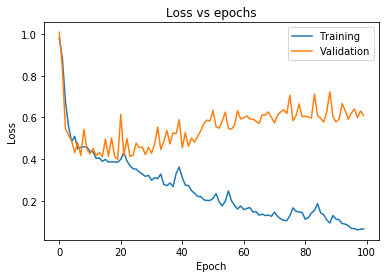

In [16]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [18]:
def get_regularized_model(wd, rate):
    model = Sequential([
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(1)
        ])
    
    return model

In [19]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [20]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9987 - mae: 0.8507 - val_loss: 1.0700 - val_mae: 0.8879
Epoch 2/100
337/337 - 0s - loss: 0.9864 - mae: 0.8439 - val_loss: 1.0377 - val_mae: 0.8745
Epoch 3/100
337/337 - 0s - loss: 0.9475 - mae: 0.8264 - val_loss: 0.9446 - val_mae: 0.8428
Epoch 4/100
337/337 - 0s - loss: 0.8400 - mae: 0.7832 - val_loss: 0.7509 - val_mae: 0.7420
Epoch 5/100
337/337 - 0s - loss: 0.6977 - mae: 0.6938 - val_loss: 0.6083 - val_mae: 0.6264
Epoch 6/100
337/337 - 0s - loss: 0.6295 - mae: 0.6305 - val_loss: 0.5560 - val_mae: 0.5753
Epoch 7/100
337/337 - 0s - loss: 0.6084 - mae: 0.6210 - val_loss: 0.5451 - val_mae: 0.5795
Epoch 8/100
337/337 - 0s - loss: 0.5358 - mae: 0.5954 - val_loss: 0.4898 - val_mae: 0.5741
Epoch 9/100
337/337 - 0s - loss: 0.5754 - mae: 0.6275 - val_loss: 0.4767 - val_mae: 0.5568
Epoch 10/100
337/337 - 0s - loss: 0.5629 - mae: 0.6010 - val_loss: 0.5070 - val_mae: 0.5730
Epoch 11/100
337/337 - 0s - loss: 0.5486 - m

Epoch 90/100
337/337 - 0s - loss: 0.3474 - mae: 0.4631 - val_loss: 0.5296 - val_mae: 0.5514
Epoch 91/100
337/337 - 0s - loss: 0.3519 - mae: 0.4583 - val_loss: 0.5787 - val_mae: 0.5687
Epoch 92/100
337/337 - 0s - loss: 0.3608 - mae: 0.4816 - val_loss: 0.5569 - val_mae: 0.5667
Epoch 93/100
337/337 - 0s - loss: 0.3499 - mae: 0.4619 - val_loss: 0.5549 - val_mae: 0.5672
Epoch 94/100
337/337 - 0s - loss: 0.3528 - mae: 0.4711 - val_loss: 0.5640 - val_mae: 0.5667
Epoch 95/100
337/337 - 0s - loss: 0.3365 - mae: 0.4528 - val_loss: 0.5590 - val_mae: 0.5644
Epoch 96/100
337/337 - 0s - loss: 0.3571 - mae: 0.4631 - val_loss: 0.5600 - val_mae: 0.5651
Epoch 97/100
337/337 - 0s - loss: 0.3106 - mae: 0.4355 - val_loss: 0.5239 - val_mae: 0.5510
Epoch 98/100
337/337 - 0s - loss: 0.3265 - mae: 0.4502 - val_loss: 0.5244 - val_mae: 0.5542
Epoch 99/100
337/337 - 0s - loss: 0.3483 - mae: 0.4693 - val_loss: 0.5376 - val_mae: 0.5611
Epoch 100/100
337/337 - 0s - loss: 0.3281 - mae: 0.4529 - val_loss: 0.5097 - val

In [22]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.9259 - mae: 0.7970


[0.8977379891607496, 0.7970338]

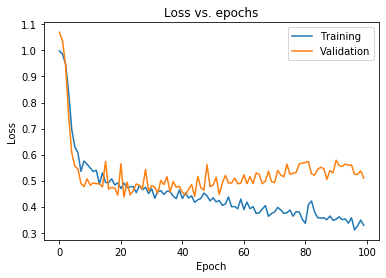

In [23]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()